In [5]:
# from pandas.io import json
# import pandas as pd
# import os

# # concat two datasets to one
# X = json.read_json(path_or_buf=os.getcwd()+"\\data.json")
# Y = json.read_json(path_or_buf=os.getcwd()+"\\label.json")
# y = Y['label'].tolist()
# dataset = pd.concat([X, Y], axis=1)

# # extract to JSON file
# dataset.reset_index(drop=True, inplace=True)
# dataset.to_json(os.getcwd() + r'\dataset.json', orient='records')

# dataset = json.read_json(path_or_buf=os.getcwd()+"\\dataset.json")
# dataset.shape

(227473, 46)

In [1]:
import os
import pandas as pd
import numpy as np
from pandas.io import json
import tensorflow as tf
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt

# read data
df = json.read_json(path_or_buf=os.getcwd() + "\\dataset.json")

df = df.drop("@timestamp", axis=1)
# df.rename(columns={'@timestamp':'timestamp'}, errors='raise', inplace=True) #'@timestamp' is not valid scope name
X = df.drop('label', axis=1)
y = df['label']

print(X.shape)
print(y.shape)


C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\ly\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


(230217, 44)
(230217,)


In [2]:
# df = df.drop("@timestamp", axis=1) ##
print(df.shape)
df.columns


(230217, 45)


Index(['Channel', 'EventID', 'ObjectName', 'SubjectUserName', 'TargetImage',
       'CallTrace', 'ImageLoaded', 'TargetFilename', 'Hostname', 'AccessMask',
       'LogonType', 'SubjectLogonId', 'TargetLogonId', 'ObjectServer',
       'ObjectType', 'NewProcessName', 'ParentProcessName', 'Image',
       'Description', 'PipeName', 'Message', 'DestPort', 'LayerRTID',
       'ParentImage', 'DestinationPort', 'User', 'ShareName',
       'RelativeTargetName', 'SourceImage', 'ProcessGuid', 'SourceProcessGUID',
       'LogonId', 'ProcessName', 'TargetObject', 'ProcessId', 'CommandLine',
       'Signed', 'StartModule', 'StartFunction', 'Properties',
       'SourceProcessGuid', 'AttributeLDAPDisplayName', 'AttributeValue',
       'ObjectValueName', 'label'],
      dtype='object')

In [3]:
X.describe()

,Channel,EventID,ObjectName,SubjectUserName,TargetImage,CallTrace,ImageLoaded,TargetFilename,Hostname,AccessMask,...,ProcessId,CommandLine,Signed,StartModule,StartFunction,Properties,SourceProcessGuid,AttributeLDAPDisplayName,AttributeValue,ObjectValueName
count,230217.000000,230217.000000,230217.000000,230217.000000,230217.000000,230217.000000,230217.000000,230217.000000,230217.000000,230217.000000,...,230217.000000,230217.000000,230217.000000,230217.000000,230217.000000,230217.000000,230217.000000,230217.000000,230217.000000,230217.00000
mean,3.906532,59.132883,7.807920,2.429256,29.189721,109.268651,75.369256,14.304560,7.957601,8.338906,...,643.472441,83.201380,0.184196,1.000339,0.999974,10.997281,0.001629,0.000026,0.000056,0.00056
std,3.458210,63.967767,19.930502,4.304342,52.383120,298.157005,252.616836,138.934024,1.363521,2.710042,...,525.621712,5.655453,0.577108,0.043417,0.028117,0.138284,0.067418,0.005105,0.012330,0.04646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,9.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,8.000000,...,0.000000,83.000000,0.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.00000
50%,2.000000,16.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,8.000000,...,730.000000,83.000000,0.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.00000
75%,8.000000,94.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,8.000000,...,1095.000000,83.000000,0.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.00000
max,11.000000,180.000000,172.000000,22.000000,174.000000,1462.000000,1454.000000,1964.000000,12.000000,51.000000,...,1432.000000,247.000000,2.000000,3.000000,3.000000,11.000000,8.000000,1.000000,4.000000,6.00000


### Distribution of features
Channel: 0-11
EventID: 0-180
ObjectName: 0-172
SubjectUserName: 0-22
TargetImage: 0-174




In [5]:
sorted(Counter(X['Channel']).items())

[(0, 3),
 (1, 20521),
 (2, 148984),
 (3, 31),
 (4, 11),
 (5, 17),
 (6, 84),
 (7, 8),
 (8, 20875),
 (9, 130),
 (10, 23174),
 (11, 16379)]

In [6]:
X.head()

,Channel,EventID,ObjectName,SubjectUserName,TargetImage,CallTrace,ImageLoaded,TargetFilename,Hostname,AccessMask,...,ProcessId,CommandLine,Signed,StartModule,StartFunction,Properties,SourceProcessGuid,AttributeLDAPDisplayName,AttributeValue,ObjectValueName
0,2,1,4,1,101,1417,0,0,6,8,...,935,83,0,1,1,11,0,0,0,0
1,2,1,4,1,101,1419,0,0,6,8,...,935,83,0,1,1,11,0,0,0,0
2,2,1,4,1,101,1418,0,0,6,8,...,935,83,0,1,1,11,0,0,0,0
3,2,13,4,1,1,0,0,0,8,8,...,718,83,0,1,1,11,0,0,0,0
4,8,136,4,1,1,0,0,0,8,8,...,718,83,0,1,1,11,0,0,0,0


## Normalization

(1) Feature scaling (min-max scaling): scale each feature to a range between 0 and 1.
$$x' = \frac{x-x_{min}} {x_{max}- x_{min}}$$

(2) Z-score scaling: Standardize features by removing the mean and scaling to unit variance.
$$x' = \frac{x-\mu} {\sigma} \$$

(3) robust scaling: Scale features using statistics that are robust to outliers.


In [150]:
# # min-max scaling
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [4]:
# z-score scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [170]:
# # robust scaling
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(X)

## Resampling
Use SMOTE here because it gets the best performance in Decision Tree.

In [5]:
# Use SMOTE to do oversampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("y before oversampling: ", sorted(Counter(y_train).items()))
print("y after oversampling: ", sorted(Counter(y_resampled).items()))

y before oversampling:  [(0, 154146), (1, 99)]
y after oversampling:  [(0, 154146), (1, 154146)]


## DNN model
References:
"Deep Learning for Prioritizing and Responding to Intrusion Detection Alerts"

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4821/4821 - 5s - loss: 0.0114 - accuracy: 0.9986 - auc: 0.6157 - 5s/epoch - 1ms/step
Epoch 2/100
4821/4821 - 4s - loss: 0.0047 - accuracy: 0.9993 - auc: 0.6936 - 4s/epoch - 864us/step
Epoch 3/100
4821/4821 - 4s - loss: 0.0045 - accuracy: 0.9993 - auc: 0.7149 - 4s/epoch - 853us/step
Epoch 4/100
4821/4821 - 4s - loss: 0.0041 - accuracy: 0.9994 - auc: 0.7413 - 4s/epo

Epoch 74/100
4821/4821 - 4s - loss: 0.0034 - accuracy: 0.9995 - auc: 0.8315 - 4s/epoch - 781us/step
Epoch 75/100
4821/4821 - 4s - loss: 0.0056 - accuracy: 0.9995 - auc: 0.8466 - 4s/epoch - 798us/step
Epoch 76/100
4821/4821 - 4s - loss: 0.0029 - accuracy: 0.9995 - auc: 0.8215 - 4s/epoch - 836us/step
Epoch 77/100
4821/4821 - 4s - loss: 0.0030 - accuracy: 0.9995 - auc: 0.7769 - 4s/epoch - 823us/step
Epoch 78/100
4821/4821 - 4s - loss: 0.0042 - accuracy: 0.9995 - auc: 0.8272 - 4s/epoch - 840us/step
Epoch 79/100
4821/4821 - 4s - loss: 0.0026 - accuracy: 0.9995 - auc: 0.8669 - 4s/epoch - 826us/step
Epoch 80/100
4821/4821 - 4s - loss: 0.0027 - accuracy: 0.9995 - auc: 0.8572 - 4s/epoch - 835us/step
Epoch 81/100
4821/4821 - 4s - loss: 0.0034 - accuracy: 0.9995 - auc: 0.8520 - 4s/epoch - 839us/step
Epoch 82/100
4821/4821 - 4s - loss: 0.0036 - accuracy: 0.9995 - auc: 0.8514 - 4s/epoch - 819us/step
Epoch 83/100
4821/4821 - 4s - loss: 0.0144 - accuracy: 0.9995 - auc: 0.8273 - 4s/epoch - 829us/step


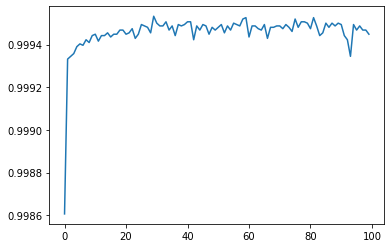

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam

# Define the input shape
input_shape = (44,)

# Neuron counts for the first hidden layer were three times the number of input neurons needed for the feature vector,
# The neuron counts for subsequent hidden layers were half od the preceding layer

# Define the number of neurons in each hidden layer
hidden_counts = [132, 66, 33, 16]

# Define the number of output neurons
num_classes = 1

# Define the activation function for the hidden layers
activation_fn = 'relu'

# Define the weight initializer
initializer = GlorotUniform(seed=42) # seed

# Define the optimizer
optimizer = Adam()

# Define the model architecture
model = tf.keras.Sequential()

# Add the input layer
model.add(layers.InputLayer(input_shape=input_shape))

# Add the hidden layers
for i, count in enumerate(hidden_counts):
    model.add(layers.Dense(count, activation=activation_fn, kernel_initializer=initializer, name=f'hidden_{i+1}'))

# Add the output layer
# model.add(layers.Dense(num_classes, activation='softmax', kernel_initializer=initializer, name='output'))
model.add(layers.Dense(num_classes, activation='sigmoid', kernel_initializer=initializer, name='output'))


# Compile the model
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

hist = model.fit(X_train, y_train, verbose=2, epochs=100)
plt.plot(hist.history['accuracy'])
plt.show()

In [7]:
# evaluation
model.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2375/2375 [==============================] - 2s 740us/step - loss: 0.0048 - accuracy: 0.9995 - auc: 0.7210


[0.004759456496685743, 0.9994603395462036, 0.7209689617156982]

In this code, we use the Keras API in TensorFlow 2 to define the DNN model. We first define the input shape, which is a tuple of length 44 corresponding to the number of features in the input data. We then define the number of neurons in each hidden layer, the number of output neurons, the activation function for the hidden layers, the weight initializer, and the optimizer.

We then create a sequential model using tf.keras.Sequential() and add the input layer using layers.InputLayer(). We then add the hidden layers in a loop using layers.Dense(), which creates a fully connected layer with the specified number of neurons, activation function, weight initializer, and name.

Finally, we compile the model using model.compile() and specify the optimizer, loss function (in this case, categorical cross-entropy since we have multiple classes), and metrics to track during training (in this case, accuracy).

<span style="color:red">The feature ranking algorithm is not a standard feature of TensorFlow, so it might need to be implemented separately and incorporated into this code as part of data preprocessing pipeline.</span>

In [8]:
# prediction
from sklearn import metrics

y_predict = model.predict(X_test)
y_predict_class = np.where(y_predict >= 0.5, 1, 0)
print(metrics.classification_report(y_test, y_predict_class))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75927
           1       0.62      0.22      0.33        45

    accuracy                           1.00     75972
   macro avg       0.81      0.61      0.66     75972
weighted avg       1.00      1.00      1.00     75972



## Others

In [ ]:
f = plt.figure()
for feature in X.columns:
    plt.bar(feature.keys(), feature.values())
    f.show()

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4821/4821 [==============================] - 5s 1ms/step - loss: 0.6486 - acc: 0.9978
Epoch 2/10
4821/4821 [==============================] - 5s 997us/step - loss: 0.1130 - acc: 0.9994
Epoch 3/10
4821/4821 [==============================] - 5s 1ms/step - loss: 0.0147 - acc: 0.9994
Epoch 4/10
4821/4821 [==============================] - 5s 1ms/step - loss: 0.0069 - 

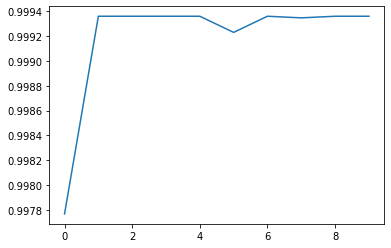

In [94]:
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(44, input_shape=(44,), activation='relu'))
# number of neurons in hidden layers [132, 37, 33, 16]
model.add(Dense(132, activation='relu'))#, kernel_initializer=initializer, name=f'hidden_{i+1}'))
model.add(Dense(66, activation='relu'))
model.add(Dense(33, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
hist = model.fit(X_train, y_train, verbose=1, epochs=10)
plt.plot(hist.history['acc'])
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(44, input_shape=(44,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
hist = model.fit(X_train, y_train, verbose=1, epochs=10)
plt.plot(hist.history['acc'])
plt.show()

In [90]:
# optimizer_adam= tf.train.AdamOptimizer(learning_rate=0.01)

# Specify that all features have real-value data
# feature_columns = [tf.contrib.layers.real_valued_column("", dimension=44)]
feature_columns = [tf.feature_column.numeric_column(column) for column in X]

def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X_train), y_train))
    dataset = dataset.shuffle(1000).repeat().batch(10)
    return dataset

def eval_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X_test), y_test))
    return dataset.shuffle(1000).repeat().batch(10)

model = tf.estimator.DNNClassifier([132, 66, 33, 16],
    feature_columns=feature_columns,
    optimizer='Adam',
    n_classes=2)

# model.add(Dense(44, input_shape=(44,), activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
# model.fit(input_fn=train_input_fn, steps=2000)
model.train(input_fn=train_input_fn, steps=1000)
# eval_results = model.evaluate(input_fn=eval_input_fn, steps=1)
# eval_results
# hist = model.fit(X_train, y_train, verbose=1, epochs=10)
# plt.plot(hist.history['acc'])
# plt.show()
# Evaluate the trained model
test_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
#     x=test_df.drop('label', axis=1),
#     y=test_df['label'],
    x=X_test,
    y=y_test,
    batch_size=32,
    num_epochs=1,
    shuffle=False
)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ly\\AppData\\Local\\Temp\\tmpvau7owrw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow

In [92]:
evaluation = model.evaluate(input_fn=eval_input_fn)
print(evaluation)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-03-07T19:46:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ly\AppData\Local\Temp\tmpvau7owrw\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


KeyboardInterrupt: 

In [11]:
# Neuron counts for the first hidden layer were three times the number of input neurons needed for the feature vector,
# The neuron counts for subsequent hidden layers were half od the preceding layer
# 
feature_columns = [tf.feature_column.numeric_column(column) for column in X] 
dnn_classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[135, 67, 33, 16],
    activation_fn=tf.nn.relu,
    dropout=0.2) # dropout

# print(len(feature_columns))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ly\\AppData\\Local\\Temp\\tmp9atahdnp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
# Train the DNNClassifier
train_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
#     x=train_df.drop('label', axis=1),
#     y=train_df['label'],
    x=X_train,
    y=y_train,
    batch_size=32,
    num_epochs=None,
    shuffle=True
)
dnn_classifier.train(input_fn=train_input_fn, steps=1000)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [36]:
# Evaluate the trained model
test_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
#     x=test_df.drop('label', axis=1),
#     y=test_df['label'],
    x=X_test,
    y=y_test,
    batch_size=32,
    num_epochs=1,
    shuffle=False
)

evaluation = dnn_classifier.evaluate(input_fn=test_input_fn)
print(evaluation)


INFO:tensorflow:Could not find trained model in model_dir: C:\Users\ly\AppData\Local\Temp\tmp4irgzike, running initialization to evaluate.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-03-06T20:36:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 10.48290s
INFO:tensorflow:Finished evaluation at 2023-03-06-20:36:23
INFO:tensorflow:Saving dict for global step 0: accuracy = 0.49921858, accuracy_baseline = 0.50023097, auc = 0.48020914, auc_precision_recall = 0.47808322, average_loss = 626.8509, global_step = 0, label/mean = 0.499769, loss = 626.9003, precision = 0.0, prediction/mean = 0.0040178117, recall = 0.0
{'accuracy': 0.49921858, 'accuracy_baseline': 0.50023097, 'auc': 0.48020914, 'auc_precision_recall': 0.47808322, 'average_loss': 626.8509, 'label/mean': 0.499769, 'loss': 626.9003, 'precision': 0.0, 'predicti

In [39]:
# Use the model for prediction
predict_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(
#     x=pd.DataFrame({}),
    x=X_test,
    num_epochs=1,
    shuffle=False
)

y_predict = dnn_classifier.predict(X_test)
# for idx, p in enumerate(dnn_classifier.predict(input_fn=predict_input_fn))

predictions = list(dnn_classifier.predict(input_fn=predict_input_fn))
# print(predictions)
len(predictions)

INFO:tensorflow:Could not find trained model in model_dir: C:\Users\ly\AppData\Local\Temp\tmp4irgzike, running initialization to predict.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<generator object Estimator.predict at 0x000001DD8CE73E58>
